---

# Assignment 1 - Algorithms in computational biology (INFO-F438)
## Optimal Protein Folding in the HP Model

Name : Roman Lešický 

Matricule : 000608972

Version : Python 3.12.8 | packaged by conda-forge

---

## Libraries : 

In [4]:
import random # needed for Task 3 
import time # needed for Task 3
import matplotlib.pyplot as plt # needed for Task 3

---

## Task 1 : 

Code a function `bestfold(S)` that takes a string S that is made entirely of H and P characters and outputs a folding with the best score (it may not be unique) and the best score.

Your code should use a brute-force recursion. The folding should be represented visually, for example, like this, where * represents an adjacent characters in the string, and - and | represent adjacent H - H pairs that are not adjacent in the string :

In [ ]:
# For this algorithm there will only be two Global variable 

# Global variables to hold the best score and the best folding (list of grid positions)
best_score = 0 # here this variable will determine the maximum number of Hydrophobic-Hydrophobic (H-H) interaction for any folding 
best_fold = []  # here the second one is a tuple which will store the path for "coordinates" in the 2D grid for each residue in the inputted string that gave the best score

# This is the main function of Task 1 

def bestfold(protein_sequence,showing_results = True):
    """
    This is the main function for this recursive brute-force approach for the Hydrophobic-Hydrophilic folding model. 
    Essentially its this function which will validate the input, initialise the grid and search space and will call the recursive search to 
    explore all the valid folding which will be scored and finish with an ASCII visualisation of the folded protein as per the HP model for protein folding. 
    
    To do this different functions are used : 
    
    -> bestfold() deals with the input validation 
    -> bestfold() deals with the grid and path initialization 
    
    -> search() deals with the recursive search 
    
    -> calculation_of_the_score() deals with the score calculation 
    
    -> visualiation_of_the_folding() deals with the ASCII visualisation 
    
    Input : 
    
    - protein_sequence : which is the string sequence of only H's and P's which represent the Hydrophobic and Hydrophilic residues seen in proteins, 
    - showing_results : which is a functionality where the user can chose if they want to display the output of the algorithm, 
                        the reason for this is that for the latter task this might want to be deactivated by default this is ON so it will print out the results but False means it will stop this
    
    Output : Gives the protein sequence which was initially inputted and its ASCII folded representation 
    """
    
    global best_score, best_fold # declaring that these are global variables and not local ones since they get updated just after 

    # To comply with the "simple" definition of protein folding where the input has to be either a H or P residue the input 
    # is directly put in a upper case 
    
    protein_sequence = protein_sequence.upper()
    
    # Simple for loop to verify that only H's or P's were inputted 
    
    for letter in protein_sequence:
        if letter not in "HP" :
            message = print("Wrong primary amino acid sequence was inputted, the string can only contain H's or P's respectively Hydrophobic and Hydrophilic residues")
            
            if showing_results:
                print(message)
    
            return message
        

    # The actual "updating" of the global variables, this is done to reset them since we call bestfold() more than once 
    best_score = 0
    best_fold = []

    # Here we store all the possible moves in a list of tuples, these are Right / Down / Left and Up since we are moving in a 2 dimensional plane 
    moves = [(1, 0), (0, 1), (-1, 0), (0, -1)]

    # Here we define that we start the Folding processus at at the starting position of 0,0 
    start = (0, 0)
    
    # Here different things are created to track the path and what used coordinates, both of these are crucial for the search() function 
    
    path = [start] # here we create a List with the path meaning the coordinates of the protein as the Folding occurs 
    used = {start} # here we create a set to keep track of all the occupied positions to never place two residues in a single cell in the grid 
    
    # This is the actual start of the recursive brute-force search from the second residue since the first was placed at (0,0)
    search(protein_sequence, 1, path, used, moves) # more information on this down 

    # This if condition is here in case the algorithm has not found a valid Folding conformation 
    if not best_fold:
        warning = print(f"No actual valid folding was found for the sequence {protein_sequence}")
        return warning

    # Here the code extracts the best score and generate an ASCII visualisation from the "best_fold" of the protein folding 
    
    final_score = calculation_of_the_score(protein_sequence, best_fold)
    visualiation = visualiation_of_the_folding(protein_sequence, best_fold)

    if showing_results == True:
        # Like in the given example the code prints "Best score for ... is ... "
        print("Best score for " + protein_sequence + " is " + str(final_score))
    
        # Here this prints the ASCII visualisation line-by-line   
        for line in visualiation.splitlines(): # we do skip the blank lines
            if line.strip(): 
                print(line.rstrip())
            
# These are the "accompanying" functions used in the main function which is bestfold()

def search(protein_sequence, index, path, used, moves):
    """
    So as the name of the function suggest this function will produce an exhaustive recursive depth first search to explore 
    every "folding configuration" of the inputted primary sequence of Amino Acids. 
    
    Input : 
    
    - protein_sequence : the string sequence of only H's and P's which represent the Hydrophobic and Hydrophilic residues seen in proteins 
    - index : this represents the current position of the sequence being Folded, this has a value of 1 in the begining representing the 2nd residue (as can be seen in bestfold())
    - path : this is a list of tuples, where the coordinates for the residues in the grid are stored (at their current location)
    - used : set of tuples, here this set tracks the positions which are already used, this is done to avoid any possible overlap
    - moves : list of tuples which encompasses the 4 allowed motions in the grid Right / Down / Left and Up
    
    Output : 
    
    The search() function works to modify the global variables of best_score and best_fold, the search() function really allows to "search" for 
    the best folding configuration and it does within the bestfold() function via "updating" the global variables.
    """
    
    global best_score, best_fold # here we re-use global to specify that these are global variables

    # This if statement is here for when the actual folding is complete, if this is True the score of the current folding is computed 
    # and it will be compared to the current "best" score if the new best score is better this becomes the better score, however if 
    # the best score is equivalent there is a "tie-breaker" with tie_breaker_for_best_score where the fold that is the most Taller and then Narrower is favoured (this is arbitrary)
    
    if index == len(protein_sequence):
        score = calculation_of_the_score(protein_sequence, path) # so here we use the calculation function to determine the score of the "current" folded protein 
    
        if score > best_score: # the simple case as described before
            best_score = score
            best_fold = path.copy()
    
        elif score == best_score and tie_breaker_for_best_score(path, best_fold): # the tie-breaking case as described before
            best_fold = path.copy()
    
        return

    # Here we determine the current position in the Folding process
    current = path[-1]

    # Here for each direction (Right / Down / Left and Up ) a new grid direction (dx and dy) is calculated here, there is a continue to take into account the positions which are stored in used

    for dx, dy in moves:
        new_position = (current[0] + dx, current[1] + dy)
        if new_position in used:
            continue  # # The continue which takes into account the used positions and will skip if the cell is already occupied 
        
        # However it the cell is not occupied this will execute, where the residue will be placed and the recursion called to exhaustively explore all the folding by "moving"
        path.append(new_position)
        used.add(new_position)
        search(protein_sequence, index + 1, path, used, moves)
        path.pop()
        used.remove(new_position)

def calculation_of_the_score(protein_sequence, positions):
    """
    This function is does a crucial role in the algorithm, it computed te score of a given folding conformation, as per specification in the assignment. 
    Where we try do determine the score of a given protein folding conformation on the number of non-consecutive Hydrophobic (H-H) paris which are adjacent in the grid, this does testify of
    the driving Hydrophobic effect seen in proteins thermodynamics and is also used here to model a more favorable score. 
    
    Input :
    
    - protein_sequence : the original string of amino acids (primary sequence)
    - positions :  the list of (x,y) tuples, which represent the grid coordinates for each residue in the folding path 
    
    Output : 
    
    - score : meaning the integer which represents the total number of non-consecutive H-H adjacent pairs. 
    """
    
    score = 0  # here we start with a score of 0 for each folding conformation that will be evaluated 
    
    n = len(positions) # here we determine the number ot total residues in the inputted primary sequence of Amino Acids 
    
    for i in range(n):
        for j in range(i + 2, n):  # Here we iterate over all non-consecutive residues, also we do i + 2 (and not 1 since adjacent residues in the sequence are always connected on the grid and shouldn't count toward the score)
            
            if protein_sequence[i] == 'H' and protein_sequence[j] == 'H': # here we only proceed if BOTH residues are Hydrophobic 
                x1, y1 = positions[i]
                x2, y2 = positions[j] # here we just retrieve the grid positions 
                
                if abs(x1 - x2) + abs(y1 - y2) == 1: # here the Manhattan Distance is determined since we want to determine the distance between two points in the Grid 
                    score += 1                       # this ides was found here https://www.datacamp.com/tutorial/manhattan-distance 
                                                     # since we use the Manhattan distance we do this to determine the pairs of H-H which are adjacent if they are the distance = 1 (with which we increment the score)
    
    return score # and the score is returned for each configuration 

def tie_breaker_for_best_score(current_fold, current_best_fold):
    """
    As described in the search() function the role of this function is as a tie-breaker when we have the same best score, here we will prefer a more Vertical and Compact structure.
    
    Input : 
    
    - current_fold : which is a list of (x,y) tuples, here this represents the grid coordinates of the current folded conformation 
    - current_best_fold : also a list of (x,y) tuples, but here we have the current "best" folding conformation so far found by the algorithm 
    
    Output : 
    
    - True or False, depending if the conformation that is being tested is better than the actual "best" conformation 
    """
    
    if not current_best_fold: # if statement to see if we have an actual current best fold if so the answer output is True 
        return True
    
    # Here we just extract the coordinates from the the two inputs 
    current_x = [p[0] for p in current_fold]
    current_y = [p[1] for p in current_fold]
    
    current_best_fold_x = [p[0] for p in current_best_fold]
    current_best_fold_y = [p[1] for p in current_best_fold]

    # Since we determine which conformation is better with the same score the deciding factor is the Vertical heigh which is determined here (by determining the Height)
    new_height = max(current_y) - min(current_y)
    old_height = max(current_best_fold_y) - min(current_best_fold_y)
    
    # Very simply if the new fold is taller we chose this one and it becomes the new current_best_fold if not we keep the current current_best_fold
    
    if new_height > old_height:
        return True
    
    elif new_height < old_height:
        return False

    # If he Height (Vertical) aspect is the same we look at the Norrowness (Horizontal widht) where we apply the same logic as above
    new_width = max(current_x) - min(current_x)
    old_width = max(current_best_fold_x) - min(current_best_fold_x)
    
    return new_width < old_width

def visualiation_of_the_folding(protein_sequence, positions):
    """
    As per the assignment we need to create an ASCII visualization of the protein folding for the HP model. Here the different amino acids which are categorized according 
    to their liking or disliking of water. Here this function will place the different residues into the grid, where a  '*' shows the connections between consecutive residues 
    and'|' or '-' marking H-H contacts.
    
    Input :
    
    - protein_sequence : the original string of amino acids (primary sequence)
    - positions :  the list of (x,y) tuples, which represent the grid coordinates for each residue in the folding path 
    
    Output :
    
    - the ASCII visual representation of the folded protein
    """
    
    # First the algorithm needs to determine the upper and lower bounds for both directions to know to what extent the visualisation can span
    # Determine grid boundaries.
    
    xs = [p[0] for p in positions]
    ys = [p[1] for p in positions]
    
    min_x, max_x = min(xs), max(xs)
    min_y, max_y = min(ys), max(ys)

    # Here a dictionary called gris is used to map grid coordinates to characters
    grid = {}

    # For loop which will place each residue in the grid
    for i, (x, y) in enumerate(positions):
        grid[(2*(x - min_x), 2*(max_y - y))] = protein_sequence[i]
        # the 2* is so that the residues are not clumped together so the figure is more "aérée"
        # also the the y axis is inverted this is a deliberate choice which serves stylistic purposes 

    # For loop which will draw connections meaning "*" between each consecutive residue 
    for i in range(len(positions) - 1):
        x1, y1 = positions[i]
        x2, y2 = positions[i + 1] 
        
        # here we determine the mid point where the * will figure in the visualisation 
        mid_x = (2*(x1 - min_x) + 2*(x2 - min_x)) // 2
        mid_y = (2*(max_y - y1) + 2*(max_y - y2)) // 2
        
        grid[(mid_x, mid_y)] = '*' # the actual placement at that specific position 

    # Here deal with the Non-consecutive H-H residues for which "|" and "-" is used 
    n = len(positions)
    
    for i in range(n):
        for j in range(i + 2, n): # same logic as for the calculation_of_the_score function 
            if protein_sequence[i] == 'H' and protein_sequence[j] == 'H': # so only if we have H & H pairs 
                
                x1, y1 = positions[i]
                x2, y2 = positions[j]
                
                if (x1 == x2 and abs(y1 - y2) == 1) or (y1 == y2 and abs(x1 - x2) == 1): # here we check if the pair of H & H are adjacent in the grid (Manhattan distance of 1)
                    
                    mid_x = (2*(x1 - min_x) + 2*(x2 - min_x)) // 2
                    mid_y = (2*(max_y - y1) + 2*(max_y - y2)) // 2
                    
                    # same logic with the mid point here too
                    if (mid_x, mid_y) not in grid:
                        grid[(mid_x, mid_y)] = '|' if x1 == x2 else '-' # if vertical | and horizontal if -

    # Here since we applied the 2* transformation we also need to widen the final visualiation of the grid
    grid_width = 2 * (max_x - min_x) + 1
    grid_height = 2 * (max_y - min_y) + 1
    
    # Here we do the actual visualisation row by row, here we fill with empty spaces "" if no character is to be placed at the grid in that coordinate 
    
    visualiation_lines = []
    for y in range(grid_height):
        line = ""
        for x in range(grid_width):
            line += grid.get((x, y), " ")
        visualiation_lines.append(line)
    return "\n".join(visualiation_lines) # and we combine it all


---

## Task 2 : 

Show the solutions you find for the following strings :

##### "HPHHHHPPHPPH"

In [ ]:
protein_sequence = "HPHHHHPPHPPH"
bestfold(protein_sequence)

# The same solution is obtained as provided in Assignment 1 just inverted such should be the case for the rest of the other representations 

Best score for HPHHHHPPHPPH is 5
P*P
* *
H-H*P
| | *
H*H*P
* |
H*H
| *
H*P


##### "HPPHPHP"

In [29]:
protein_sequence = "HPPHPHP"
bestfold(protein_sequence)

Best score for HPPHPHP is 2
P*P
* *
H-H
| *
H*P
*
P


##### "HHHHHHHHH"

In [30]:
protein_sequence = "HHHHHHHHH"
bestfold(protein_sequence)

Best score for HHHHHHHHH is 4
H*H*H
* | *
H*H-H
| | *
H*H*H


##### "HHHPHPPHPHPPHHHPH"

In [14]:
protein_sequence = "HHHPHPPHPHPPHHHPH"
bestfold(protein_sequence)

Best score for HHHPHPPHPHPPHHHPH is 8
    P*P
    * *
  P*H-H*P
  * | | *
P*H-H*H*H
* | | |
P*H*H*H
    | *
    H*P


---

## Task 3 (Part 1) : 

Plot the runtime of your function on random strings on length $n$, for reasonable choices of $n$. 

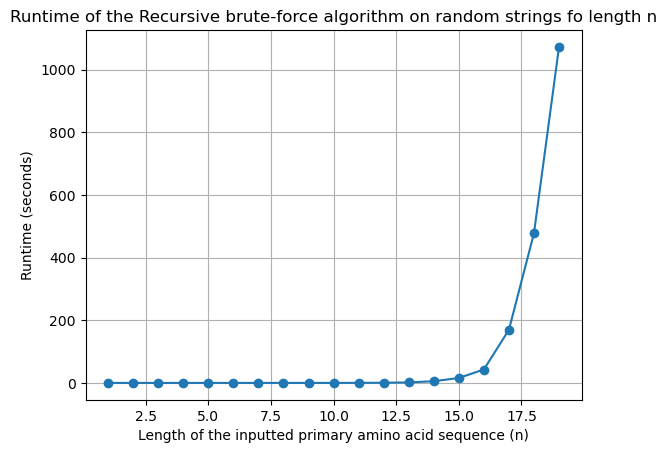

In [ ]:
n_values = [] # list where the n (length of the protein) are stored in 
runtime_values = [] # list where the runtime in seconds are stored 

# Start from 1 
n = 1

# While loop where the "stopping" criteria is that we reach n = 19 
while True:
    protein = ''.join(random.choice("HP") for _ in range(n)) 
    # here the choice function from the random module is used, here we randomly use from H and P to make a random amino acid sequeunce of increasing size from 1 to 19
    
    start_time = time.time()
    bestfold(protein, False)  # Call your existing folding function.
    elapsed_time = time.time() - start_time
    
    n_values.append(n)
    runtime_values.append(elapsed_time)
    
    # Stop if the when n equals 19 
    if n == 19:
        break
    
    n += 1

# The actual Matplotlib plotting 

plt.figure()
plt.plot(n_values, runtime_values, marker='o')
plt.xlabel("Length of the inputted primary amino acid sequence (n)")
plt.ylabel("Runtime (seconds)")
plt.title("Runtime of the Recursive brute-force algorithm on random strings fo length n")
plt.grid(True)
plt.show()

### Interpretation of the graphic from Task 3 (part 1)

Here as we can see for small values if n (around the 1 to 13 values) the runtime is quite small, once the n values becomes larger (14 and beyond) the real "inefficacy" of the method starts to show. Here just for doing n = 19 the runtime was in the 1100 range of seconds which is roughly 18.33 minutes. 

If we had to talk in terms of big-O complexity, this first method with a in depth-recursion does produces an exponential time complexity which is not ideal to say the least. If we want to be more precise we if we consider that each 
new residue the algorithm considers all possible moves (4 for the fist move and than 3 since we exclude the previous cell) also we since we start the recursion from index 1 (since the first residue is fixed) we can say that the big-O complexity is $O(3^{n-1})$. 

For information initially I chose an n equal 19, since this was the last value of n which was doable in a reasonable about of time. I tried running n = 20  this did not finish at more than 1 hour and 15 minutes 



## Task 3 (Part 2) : 

What is the largest $n$ for which your program can usually solve a random string of length $n$ in under a minute?

In [16]:
n = 1
last_successful_runtime = 0

while True:
    protein = ''.join(random.choice("HP") for _ in range(n))
    start = time.time()
    bestfold(protein, False)  # call your folding function
    elapsed = time.time() - start

    if elapsed >= 60:
        print(f"The largest n solved in under a minute is: {n - 1}")
        print(f"Runtime for n = {n - 1} was: {last_successful_runtime} seconds")
        break

    last_successful_runtime = elapsed
    n += 1

The largest n solved in under a minute is: 16
Runtime for n = 16 was: 34.07448434829712 seconds


---

## Task 4 (Part 1): 

Use a branch-and-bound technique to give up on recursions which have no hope of leading to the best score. Code this, call it `bestfold2(S)`, and describe how you make the decision to give up on a solution. You may also want to choose which recursive branch to try first using a greedy heuristic, if you do so, please describe. 

#### Explanation of the adaptation made to the algorithm :

In this branch-and-bound approach of the recursive brute-force algorithm, everything remains largely identical in terms of the code. Except for the modification of the `bestfold2()` function, where an upper-bound calculation was added, and the `search()` function which has been modified to take into account the prior mentioned method. 

According to tasks requirements, this second iteration of the HP model is based on branch-and-bound pruning and a greedy heuristic to speed up the algorithm. The adaptation of these has directly improved the runtime as in Task 4 (part 2). For example, for n = 19 the first iteration took approximately 1100 seconds and now with this second one it takes only 4 seconds. 

Thus, adapting this heuristic approach instead of a deterministic one sped up the algorithm by a factor of 275x times (*Note : this is a subjective calculation for only n = 19 and cannot be generalized*) for a sequence where the first algorithm started to struggle significantly. 

So by giving up on a deterministic solution we achieved a significant performance gain.

As previously stated these are the two different methods which were used to achieve this : 

1) Pruning done by the branch-and-bound approach : Here we avoid exploring folding paths that can't really lead to a better solution. This is done by calculating an "optimistic" estimation of the maximum possible score that could be realistically achieved for the current folding path. If this upper bound is worse than the current best score, the algorithm prunes that branch of the search tree and avoiding on "wasting" further time on an unpromising branch. 

2) Greedy move ordering : So, here instead of trying moves in a fixed order of always Right / Down / Left and Up here the algorithm calculates which moves would immediately result in an H-H contact. Which is the primary goal of the HP model, this in terms allows for swifter exploration of more promising paths first. 

However, this does have some drawback which should be noted such as : 

- There is a risk of missing valid solutions, since this approach uses an upper-bound estimation for pruning this can lead to premature eliminations of some valid paths which could result in an actual valid solution. 

- Greedy bias, where this approach might prioritize moves which should provide a "sonner" or even immediate better score potentially leading to even earlier pruning. This could in term lead to miss out on better folding conformations that could have emerged later in the search path.

- Heuristic limitations, by definition this is a heuristic approach and not a deterministic one. So, there is a risk of not actually finding the optimal folding since we do not explore all the  conformations. If the correct path is pruned the final result might be suboptimal. This is in direct contrast with the first method which guaranteed a through optimal exploration of the folding conformations.

In [18]:

# No additional comments are present except for the changed methods and their code 

best_score = 0 
best_fold = []  

def bestfold2(protein_sequence, showing_results = True):
    
    global best_score, best_fold 
    
    protein_sequence = protein_sequence.upper()
    
    for letter in protein_sequence:
        if letter not in "HP":
            message = "Wrong primary amino acid sequence was inputted, the string can only contain H's or P's respectively Hydrophobic and Hydrophilic residues"
            
            if showing_results:
                print(message)
    
            return message
        
    best_score = 0
    best_fold = []

    moves = [(1, 0), (0, 1), (-1, 0), (0, -1)]

    start = (0, 0)
    
    path = [start] 
    used = {start}
    
    # Here a variable called h_count is added which will count the number of H's in the sequence which is used for the upper bound calculation done later on 
    h_count = protein_sequence.count('H')
    
    # So here instead of doing the search() which was a brute-force method we do it with the branch-and-bound approach 
    search_with_branch_and_bound(protein_sequence, 1, path, used, moves, 0, h_count)

    if not best_fold:
        warning = "No actual valid folding was found for the sequence " + protein_sequence
        if showing_results:
            print(warning)
        return

    final_score = calculation_of_the_score(protein_sequence, best_fold)
    visualiation = visualiation_of_the_folding(protein_sequence, best_fold)

    if showing_results:
        print("Best score for " + protein_sequence + " is " + str(final_score))
        for line in visualiation.splitlines():
            if line.strip(): 
                print(line.rstrip())
    
    
# As before here are the "accompanying" functions used in the main function which is bestfold2()

def search_with_branch_and_bound(protein_sequence, index, path, used, moves, current_score, h_count):
    """
    Essentially this function produces the same "function" as the search() in Task 1 however, here as said previously it utilisez a 
    recursive depth-first search (DFS) function enhanced with branch-and-bound pruning and a greedy heuristic.
    
    So it will explore all the folding conformation of the protein sequence on the 2 dimensional grid, where here each folding path 
    is tried ONLY if it could possible lead to a better score pruning less "promising" paths. 
    
    Input:
    
    - protein_sequence : the string sequence of only H's and P's which represent the Hydrophobic and Hydrophilic residues seen in proteins 
    - index : this represents the current position of the sequence being Folded, this has a value of 1 in the begining representing the 2nd residue (as can be seen in bestfold())
    - path : this is a list of tuples, where the coordinates for the residues in the grid are stored (at their current location)
    - used : set of tuples, here this set tracks the positions which are already used, this is done to avoid any possible overlap
    - moves : list of tuples which encompasses the 4 allowed motions in the grid Right / Down / Left and Up
    
    (These are the additional parameters)
        
    - current_score: this variable represents the current score of the partial folding so far 
    - h_count: here we keep in mind that total number of "H"'s residues in the entire protein sequence used for the estimation og the upper bounds 
    
    Outputs :
    
    Again this search function does not really produce an output but it updated the global 
    
    """
    
    global best_score, best_fold

    # same as before 
    if index == len(protein_sequence):
        if current_score > best_score:
            best_score = current_score
            best_fold = path.copy()
            
        elif current_score == best_score and tie_breaker_for_best_score(path, best_fold):
            best_fold = path.copy()
        
        return

    # Here this is where the Pruning happens, here the algo calculate the upper bound for the current partial solution :
    
    remaining_residues = len(protein_sequence) - index # here we determine how many residues still need to be placed 
    
    # A simple upper bound: current score + maximum possible additional contacts
    # We assume each remaining H could form at most 2 new contacts
    
    # Here the code will count how many H residues remain and estimate the maximum possible contact they could actually form 
    # technically each H residue could have 3 different interaction in the 2D grid, however assuming that it could only do this 
    # with 2 residues this might be a bit more realistic approach as for the Upper-bound
    
    remaining_h = protein_sequence[index:].count('H')
    max_possible_additional_contacts = remaining_h * 2
    
    upper_bound = current_score + max_possible_additional_contacts # here we actually determine the Upper-bound 
    
    # Here the code does the actual pruning of the branch-and-bound method
    # where if upper bound is not better than current best score, skip this branch
    if upper_bound <= best_score:
        return

    current = path[-1]
    
    # Here a list is created where the "information" about moves should / might increase score will be stored 
    potential_moves = []
    
    # So here we try each of the 4 direction and skip ANY move that lands on an already-used positions 
    for dx, dy in moves:
        new_position = (current[0] + dx, current[1] + dy)
        
        # the actual code which will skip the position is already used
        if new_position in used:
            continue
        
        # Here this chunk of code will calculate the score gain from this move 
        score_gain = 0
        if protein_sequence[index] == 'H':
            
            # Chunk which will check if placing an H here would create new H-H contacts
            for nx, ny in [(new_position[0]+1, new_position[1]), 
                           (new_position[0]-1, new_position[1]), 
                           (new_position[0], new_position[1]+1), 
                           (new_position[0], new_position[1]-1)]:
            
                if (nx, ny) in used and (nx, ny) != current:  # Here we precise that we do not count the position of previous residues but check all the others 
                    # Here we dictate that if the neighbor is another non-consecutive "H" this should be valid contact and we gain a point in the score 
                    pos_index = path.index((nx, ny)) if (nx, ny) in path else -1
                
                    if pos_index != -1 and abs(pos_index - index) > 1 and protein_sequence[pos_index] == 'H':
                        score_gain += 1
        
        # Here we add the move to the list with if an immediate score was gained 
        potential_moves.append((dx, dy, score_gain))
    
    # Here a sorting is done, it will prefer immediate score gain to others, this here represents the Greedy part 
    potential_moves.sort(key=lambda x: x[2], reverse=True)
    
    # Here the code applies and updates the path and used variables to reflect the new residue being placed 
    for dx, dy, score_gain in potential_moves:
        new_position = (current[0] + dx, current[1] + dy)
        
        path.append(new_position)
        used.add(new_position)
        
        # Here a recursion is done, where the code will try placing the next residue using the updated score and state 
        search_with_branch_and_bound(protein_sequence, index + 1, path, used, moves, 
                                    current_score + score_gain, h_count)
        
        # And finally a backtracking is done 
        path.pop()
        used.remove(new_position)

# Here the rest is the same :

def calculation_of_the_score(protein_sequence, positions):
    """
    This function is does a crucial role in the algorithm, it computed te score of a given folding conformation, as per specification in the assignment. 
    Where we try do determine the score of a given protein folding conformation on the number of non-consecutive Hydrophobic (H-H) paris which are adjacent in the grid, this does testify of
    the driving Hydrophobic effect seen in proteins thermodynamics and is also used here to model a more favorable score. 
    
    Input :
    
    - protein_sequence : the original string of amino acids (primary sequence)
    - positions :  the list of (x,y) tuples, which represent the grid coordinates for each residue in the folding path 
    
    Output : 
    
    - score : meaning the integer which represents the total number of non-consecutive H-H adjacent pairs. 
    """
    
    score = 0
    n = len(positions)
    
    for i in range(n):
        for j in range(i + 2, n):
            if protein_sequence[i] == 'H' and protein_sequence[j] == 'H':
                x1, y1 = positions[i]
                x2, y2 = positions[j]
                
                if abs(x1 - x2) + abs(y1 - y2) == 1:
                    score += 1
    
    return score

def tie_breaker_for_best_score(current_fold, current_best_fold):
    """
    As described in the search() function the role of this function is as a tie-breaker when we have the same best score, here we will prefer a more Vertical and Compact structure.
    
    Input : 
    
    - current_fold : which is a list of (x,y) tuples, here this represents the grid coordinates of the current folded conformation 
    - current_best_fold : also a list of (x,y) tuples, but here we have the current "best" folding conformation so far found by the algorithm 
    
    Output : 
    
    - True or False, depending if the conformation that is being tested is better than the actual "best" conformation 
    """
    
    if not current_best_fold:
        return True
    
    current_x = [p[0] for p in current_fold]
    current_y = [p[1] for p in current_fold]
    
    current_best_fold_x = [p[0] for p in current_best_fold]
    current_best_fold_y = [p[1] for p in current_best_fold]

    new_height = max(current_y) - min(current_y)
    old_height = max(current_best_fold_y) - min(current_best_fold_y)
    
    if new_height > old_height:
        return True
    
    elif new_height < old_height:
        return False

    new_width = max(current_x) - min(current_x)
    old_width = max(current_best_fold_x) - min(current_best_fold_x)
    
    return new_width < old_width

def visualiation_of_the_folding(protein_sequence, positions):
    """
    As per the assignment we need to create an ASCII visualization of the protein folding for the HP model. Here the different amino acids which are categorized according 
    to their liking or disliking of water. Here this function will place the different residues into the grid, where a  '*' shows the connections between consecutive residues 
    and'|' or '-' marking H-H contacts.
    
    Input :
    
    - protein_sequence : the original string of amino acids (primary sequence)
    - positions :  the list of (x,y) tuples, which represent the grid coordinates for each residue in the folding path 
    
    Output :
    
    - the ASCII visual representation of the folded protein
    """
    
    xs = [p[0] for p in positions]
    ys = [p[1] for p in positions]
    
    min_x, max_x = min(xs), max(xs)
    min_y, max_y = min(ys), max(ys)

    grid = {}

    for i, (x, y) in enumerate(positions):
        grid[(2*(x - min_x), 2*(max_y - y))] = protein_sequence[i]

    for i in range(len(positions) - 1):
        x1, y1 = positions[i]
        x2, y2 = positions[i + 1] 
        
        mid_x = (2*(x1 - min_x) + 2*(x2 - min_x)) // 2
        mid_y = (2*(max_y - y1) + 2*(max_y - y2)) // 2
        
        grid[(mid_x, mid_y)] = '*'

    n = len(positions)
    
    for i in range(n):
        for j in range(i + 2, n):
            if protein_sequence[i] == 'H' and protein_sequence[j] == 'H':
                
                x1, y1 = positions[i]
                x2, y2 = positions[j]
                
                if (x1 == x2 and abs(y1 - y2) == 1) or (y1 == y2 and abs(x1 - x2) == 1):
                    
                    mid_x = (2*(x1 - min_x) + 2*(x2 - min_x)) // 2
                    mid_y = (2*(max_y - y1) + 2*(max_y - y2)) // 2
                    
                    if (mid_x, mid_y) not in grid:
                        grid[(mid_x, mid_y)] = '|' if x1 == x2 else '-'

    grid_width = 2 * (max_x - min_x) + 1
    grid_height = 2 * (max_y - min_y) + 1
    
    visualiation_lines = []
    for y in range(grid_height):
        line = ""
        for x in range(grid_width):
            line += grid.get((x, y), " ")
        visualiation_lines.append(line)
    return "\n".join(visualiation_lines)

## Example for showcasing this second iteration of the code : 

##### "HPHHHHPPHPPH" example with Branch-and-Bound :

In [37]:
protein_sequence = "HPHHHHPPHPPH"
bestfold2(protein_sequence)

Best score for HPHHHHPPHPPH is 5
P*P
* *
H-H*P
| | *
H*H*P
* |
H*H
| *
H*P


##### "HPPHPHP" example with Branch-and-Bound :

In [38]:
protein_sequence = "HPPHPHP"
bestfold2(protein_sequence)

Best score for HPPHPHP is 2
P*H*P
* | *
H-H*P
*
P


##### "HHHHHHHHH" example with Branch-and-Bound :

In [39]:
protein_sequence = "HHHHHHHHH"
bestfold2(protein_sequence)

Best score for HHHHHHHHH is 4
H*H*H
* | |
H*H*H
| | *
H*H*H


##### "HHHPHPPHPHPPHHHPH" example with Branch-and-Bound :

In [40]:
protein_sequence = "HHHPHPPHPHPPHHHPH"
bestfold2(protein_sequence)

Best score for HHHPHPPHPHPPHHHPH is 8
    P*P
    * *
  P*H-H*P
  * | | *
P*H-H*H*H
* | | |
P*H*H*H
    | *
    H*P


## Task 4 (Part 2):

Plot the runtime of your solution and compare its performance to that of your first solution.

No actual valid folding was found for the sequence HHP
No actual valid folding was found for the sequence PHPHP
No actual valid folding was found for the sequence PHPPPPP


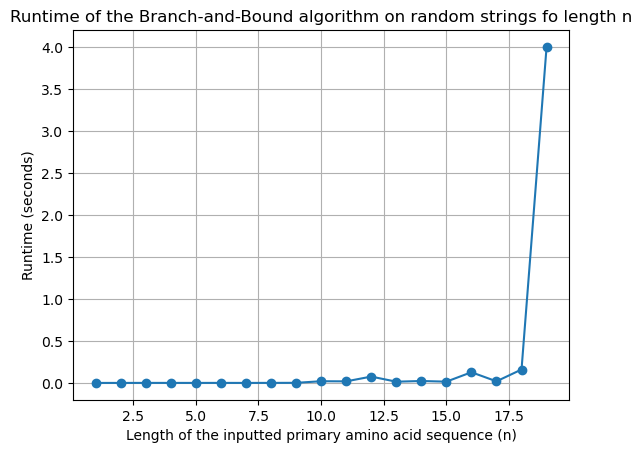

In [27]:
n_values = [] # list where the n (length of the protein) are stored in 
runtime_values = [] # list where the runtime in seconds are stored 

# Start from 1 
n = 1

# While loop where the "stopping" criteria is that we reach n = 19 
while True:
    protein = ''.join(random.choice("HP") for _ in range(n)) 
    # here the choice function from the random module is used, here we randomly use from H and P to make a random amino acid sequeunce of increasing size from 1 to 19
    
    start_time = time.time()
    bestfold2(protein, False)  # Call your existing folding function.
    elapsed_time = time.time() - start_time
    
    n_values.append(n)
    runtime_values.append(elapsed_time)
    
    # Stop if the when n equals 19 
    if n == 19:
        break
    
    n += 1

# The actual Matplotlib plotting 

plt.figure()
plt.plot(n_values, runtime_values, marker='o')
plt.xlabel("Length of the inputted primary amino acid sequence (n)")
plt.ylabel("Runtime (seconds)")
plt.title("Runtime of the Branch-and-Bound algorithm on random strings fo length n")
plt.grid(True)
plt.show()

### Comparaison of the first method and the second method : 

Just like in the first method we see low runtime for low values of n and a spike at a certain value of n, here it comes a bit later on than in the 1st method (around 17 and further). As said before at n = 19 here the runtime is of about 4 seconds which is significantly better than in the first method where this value was about 1100 seconds. Here the key difference as said before is the branch-and-bound pruning which eliminates hopeless branches coupled with a greedy approach that helps to find the solution faster these two speed-up things considerably. 

However, something which needs to be noted is the big-O time complexity notation for this second method as can be seen in the graphic in Task 4 (part 2) we also get a exponential time-complexity. Since the pruning might be ineffective at times and the algo might still explore all the solutions and just like before in the worst case scenario we can end-up with an $O(3^{n-1})$. This being said empirically this second method is much faster than the first method since many hopeless branches still get pruned which does reduce the number of conformations that need to be fully explored. 



---

## Bibliography : 

Newman, Alantha. (2002). A new algorithm for protein_sequence folding in the HP model. In SODA ACM/SIAM. 876-884. 10.1145/545381.545495.


---